In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')





/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

central
nervous
system_Aneuploid v.s. central
nervous
system_Diploid: t-test independent samples, P_val=9.496e-02 stat=-1.866e+00
colorectal_Aneuploid v.s. colorectal_Diploid: t-test independent samples, P_val=3.233e-02 stat=-2.285e+00
uterus_Aneuploid v.s. uterus_Diploid: t-test independent samples, P_val=1.570e-02 stat=-2.905e+00
ovary_Aneuploid v.s. ovary_Diploid: t-test independent samples, P_val=4.525e-01 stat=-7.897e-01
skin_Aneuploid v.s. skin_Diploid: t-test independent samples, P_val=4.729e-02 stat=-2.233e+00
gastric_Aneuploid v.s. gastric_Diploid: t-test independent samples, P_val=6.075e-02 stat=-2.412e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

central
nervous
system_Aneuploid v.s. central
ne

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ovary_Diploid v.s. ovary_Aneuploid: t-test independent samples, P_val=1.591e-03 stat=3.680e+00
skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=6.018e-01 stat=5.389e-01
gastric_Diploid v.s. gastric_Aneuploid: t-test independent samples, P_val=9.316e-02 stat=1.878e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

central
nervous
system_Diploid v.s. central
nervous
system_Aneuploid: t-test independent samples, P_val=3.471e-01 stat=9.655e-01
bone_Diploid v.s. bone_Aneuploid: t-test independent samples, P_val=nan stat=nan
colorectal_Diploid v.s. colorectal_Aneuploid: t-test independent samples, P_val=2.918e-01 stat=1.113e+00
uterus_Diploid v.s. uterus_Aneuploid: t-test independent samples, P_val=4.932e-01 stat=-7.228e-01
ovary_Diploid v.s. ovary_Aneuploid: t-test independent samples, P_val=1.452e-01 stat=1.519e+00
skin_Diploid v.s. skin_Aneuploid: t-test 

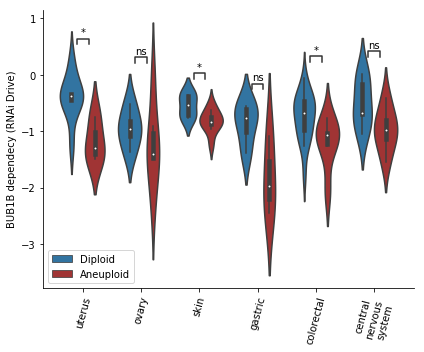

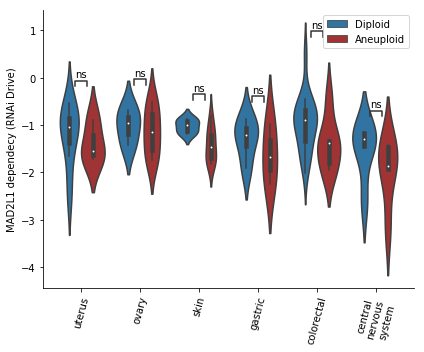

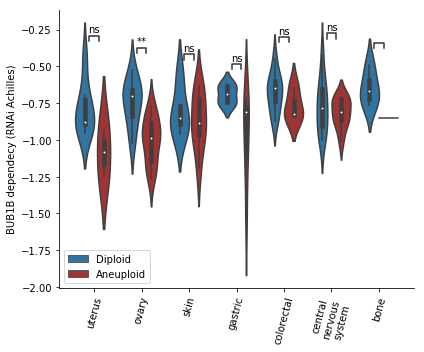

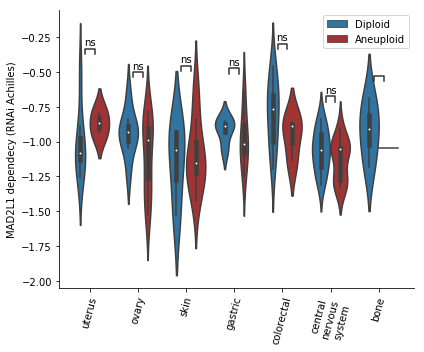

In [6]:
##########################################################################################
######################################### figex 3a #######################################
##########################################################################################


sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')

sample_info.index = sample_info.loc[:,'CCLE_Name'] 

sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']
shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'uterus' \
        and drive_box.loc[x,'lineage'] != 'ovary' and drive_box.loc[x,'lineage'] != 'skin' \
        and drive_box.loc[x,'lineage'] != 'gastric' and drive_box.loc[x,'lineage'] != 'colorectal' \
        and drive_box.loc[x,'lineage'] != 'central_nervous_system' :
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)
drive_box_ = drive_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['uterus','ovary','skin','gastric','colorectal','central\nnervous\nsystem']
##########################################################################################################
l_order = list(set(drive_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=drive_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(drive_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
#     ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B dependecy (RNAi Drive)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
# plt.savefig('fig2d/lineages_violin_BUB1B_rnai_drive.pdf')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=drive_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


box_pairs=[
    (("skin", "Diploid"), ("skin", "Aneuploid")),
    (("uterus", "Diploid"), ("uterus", "Aneuploid")),
    (("gastric", "Diploid"), ("gastric", "Aneuploid")),
    (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
    (("ovary", "Diploid"), ("ovary", "Aneuploid")),
    (("lung", "Diploid"), ("lung", "Aneuploid")),
    (("bone", "Diploid"), ("bone", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 dependecy (RNAi Drive)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
# plt.savefig('fig2d/lineages_violin_MAD2L1_rnai_drive.pdf')














shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index) 
#without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


achilles_box = gene_effect_rnai_achilles.loc[shared]

achilles_box['lineage'] = sample_info.loc[achilles_box.index,'lineage']





achilles_box['ploidy'] = anot_CCLE.loc[achilles_box.index,'many_arm_events']

trus = achilles_box[achilles_box.loc[:,'ploidy']==True].index 
achilles_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = achilles_box[achilles_box.loc[:,'ploidy']==False].index 
achilles_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in achilles_box.index:
    if  achilles_box.loc[x,'lineage'] != 'uterus' \
        and achilles_box.loc[x,'lineage'] != 'ovary' and achilles_box.loc[x,'lineage'] != 'skin' \
        and achilles_box.loc[x,'lineage'] != 'gastric' and achilles_box.loc[x,'lineage'] != 'colorectal' \
        and achilles_box.loc[x,'lineage'] != 'central_nervous_system' and achilles_box.loc[x,'lineage'] != 'bone' :
            to_drop.append(x)
            
achilles_box_ = achilles_box.drop(to_drop)
achilles_box_ = achilles_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['uterus','ovary','skin','gastric','colorectal','central\nnervous\nsystem','bone']
##########################################################################################################
l_order = list(set(achilles_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=achilles_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(achilles_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))


width = 0.4
add_stat_annotation(ax, data=achilles_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B dependecy (RNAi Achilles)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
# plt.savefig('fig2d/lineages_violin_BUB1B_rnai_achilles.pdf')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=achilles_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


width = 0.4
add_stat_annotation(ax, data=achilles_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 dependecy (RNAi Achilles)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
# plt.savefig('fig2d/lineages_violin_MAD2L1_rnai_achilles.pdf')





/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.00039089079946320236
RNAi Achilles p-value for MAD2L1: 0.026148935841399695


No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.0009367718912637332
RNAi Achilles p-value for MAD2L1: 0.08826442274940649


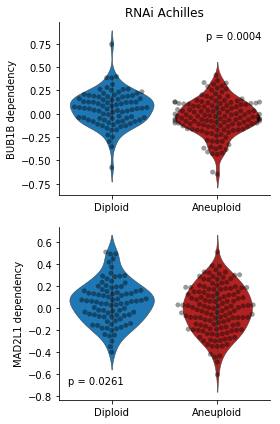

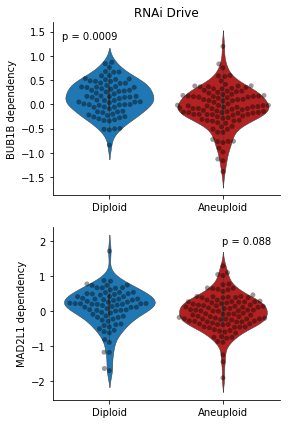

In [8]:
##########################################################################################
######################################### figex 3b #######################################
##########################################################################################


genes = ['BUB1B (701)','MAD2L1 (4085)']

gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes].dropna()
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.loc[:,genes].dropna()
gene_effect_crispr_achilles_ = gene_effect_crispr_achilles.loc[:,genes].dropna()


# correct for lineage
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[gene_effect_rnai_achilles.index,'lineage'])
mu = gene_effect_rnai_achilles_.mean()
reg = LinearRegression().fit(one_hot, gene_effect_rnai_achilles_)
preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_rnai_achilles_.index,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles = ((gene_effect_rnai_achilles_  - mu)- preds_)+ mu


enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[gene_effect_rnai_drive_.index,'lineage'])
mu = gene_effect_rnai_drive_.mean()
reg = LinearRegression().fit(one_hot, gene_effect_rnai_drive_)
preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_rnai_drive_.index,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive = ((gene_effect_rnai_drive_ - mu) - preds_)+ mu


from scipy import stats
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles.index)
temp = corrected_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()


tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'BUB1B (701)'],corrected_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
# plt.savefig('fig2a/rnai_achilles_lineage_regressed_out.pdf')


#drive



fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive.index)
temp = corrected_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'BUB1B (701)'],corrected_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'MAD2L1 (4085)'],corrected_rnai_drive.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
# plt.savefig('fig2a/rnai_drive_lineage_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/statannot-0.2.2-py3.6.egg/statannot/statannot.py:193: FutureWarning: elementwise comparison failed; returning sc

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=6.276e-03 stat=-2.849e+00
damaging_Aneuploid v.s. damaging_Diploid: t-test independent samples, P_val=1.330e-02 stat=-2.573e+00
hotspot_Aneuploid v.s. hotspot_Diploid: t-test independent samples, P_val=1.574e-02 stat=-2.472e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=2.658e-03 stat=-3.156e+00
damaging_Aneuploid v.s. damaging_Diploid: t-test independent samples, P_val=5.705e-01 stat=-5.714e-01
hotspot_Aneuploid v.s. hotspot_Diploid: t-test independent samples, P_val=3.192e-03 stat=-3.048e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 

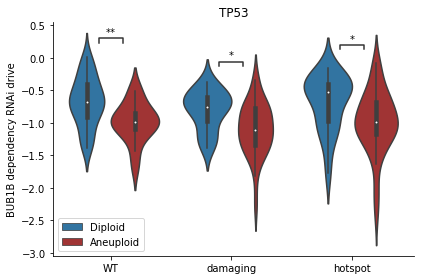

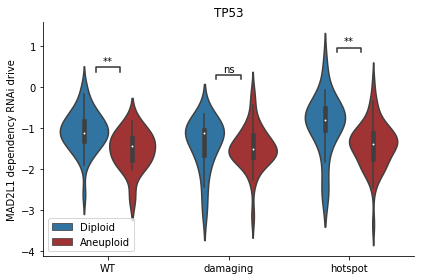

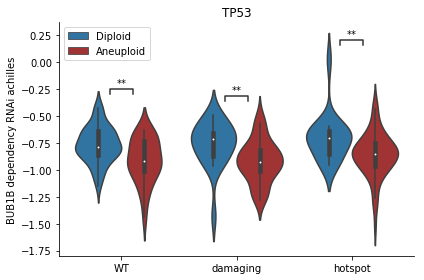

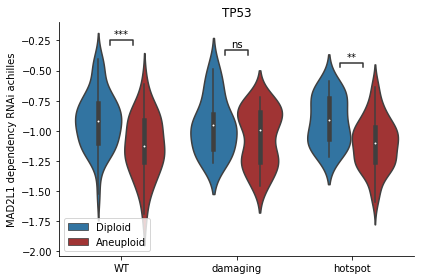

In [17]:
##########################################################################################
######################################### figex 3c #######################################
##########################################################################################

#arxspan ID
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.copy()
gene_effect_rnai_drive_ = gene_effect_rnai_drive.copy()

gene_effect_rnai_achilles_.index = sample_info.loc[gene_effect_rnai_achilles.index,'DepMap_ID']
gene_effect_rnai_drive_.index = sample_info.loc[gene_effect_rnai_drive.index,'DepMap_ID']

damaging_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='damaging_mutation')
depmap_19Q4_mutation_calls = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='depmap_19Q4_mutation_calls')
hotspot_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='hotspot_mutation')
other_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='other_mutation')


damaging_mutation.columns = damaging_mutation.columns.str.split(' ').str[0]
hotspot_mutation.columns = hotspot_mutation.columns.str.split(' ').str[0]
other_mutation.columns = other_mutation.columns.str.split(' ').str[0]

all_lines = set(damaging_mutation.index) | set(hotspot_mutation.index) | set(other_mutation.index)
all_columns = set(damaging_mutation.columns) | set(hotspot_mutation.columns) | set(other_mutation.columns)

dam_tp53 = pd.Series('damaging',index=damaging_mutation.loc[:,'TP53'][damaging_mutation.loc[:,'TP53']==1].index)

hot_tp53 = pd.Series('hotspot',index=hotspot_mutation.loc[:,'TP53'][hotspot_mutation.loc[:,'TP53']==1].index)

other_tp53 = pd.Series('other',index=other_mutation.loc[:,'TP53'][other_mutation.loc[:,'TP53']==1].index)



other_tp53 = other_tp53.loc[set(other_tp53.index) - set(dam_tp53.index) - set(hot_tp53.index)]
hot_tp53 = hot_tp53.loc[set(hot_tp53.index) - set(dam_tp53.index)]


tp53_mutations = pd.concat([pd.concat([dam_tp53,hot_tp53]),other_tp53])

wt_tp53 = pd.Series('WT',index = set(all_lines) - set(tp53_mutations.index))

all_tp53 = pd.concat([tp53_mutations,wt_tp53])








all_tp53 = pd.concat([tp53_mutations,wt_tp53])
all_tp53 = pd.DataFrame(all_tp53,columns=['status'])
all_tp53['BUB1B'] = gene_effect_rnai_drive_.loc[all_tp53.index,'BUB1B (701)']
all_tp53['MAD2L1'] = gene_effect_rnai_drive_.loc[all_tp53.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(all_tp53.dropna().index)
temp = all_tp53.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp=temp.dropna()

ax = sns.violinplot(x="status", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi drive')

box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("damaging", "Diploid"), ("damaging", "Aneuploid")),
    (("hotspot", "Diploid"), ("hotspot", "Aneuploid")),
    #(("other", "Diploid"), ("other", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])#,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plotting.simpleaxis()
# plt.savefig('bub1b_rnai_drive_tp53_updated.png')


plotting.simpleaxis()
plt.figure()


ax = sns.violinplot(x="status", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi drive')


width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc = 'lower left')
plt.tight_layout()
plotting.simpleaxis()
# plt.savefig('mad2l1_rnai_drive_tp53_updated.png')


plotting.simpleaxis()

plt.figure()

# same thing for rnai achilles


all_tp53 = pd.concat([tp53_mutations,wt_tp53])
all_tp53 = pd.DataFrame(all_tp53,columns=['status'])
all_tp53['BUB1B'] = gene_effect_rnai_achilles_.loc[all_tp53.index,'BUB1B (701)']
all_tp53['MAD2L1'] = gene_effect_rnai_achilles_.loc[all_tp53.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(all_tp53.dropna().index)
temp = all_tp53.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp=temp.dropna()

ax = sns.violinplot(x="status", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi achilles')

box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("damaging", "Diploid"), ("damaging", "Aneuploid")),
    (("hotspot", "Diploid"), ("hotspot", "Aneuploid")),
    #(("other", "Diploid"), ("other", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])#,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plotting.simpleaxis()
# plt.savefig('bub1b_rnai_achilles_tp53_updated.pdf')


plotting.simpleaxis()
plt.figure()


ax = sns.violinplot(x="status", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi achilles')


width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc = 'lower left')
plt.tight_layout()
plotting.simpleaxis()
# plt.savefig('mad2l1_rnai_achilles_tp53_updated.pdf')


plotting.simpleaxis()





No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.30360705569337043        p = 0.0001000916856930443
MAD2L1 dependency and expression : r = -0.2783305185366832        p = 0.00038176125708815566
MAD2L1 dependency and expression : r = -0.3202875126951692        p = 1.1050393316396636e-05
MAD2L1 dependency and expression : r = -0.35956334228421805        p = 6.654424155292308e-07


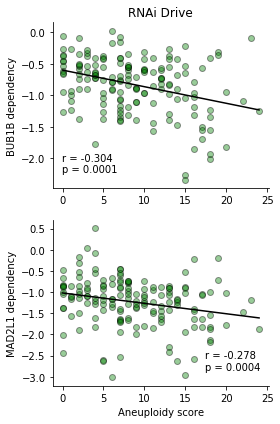

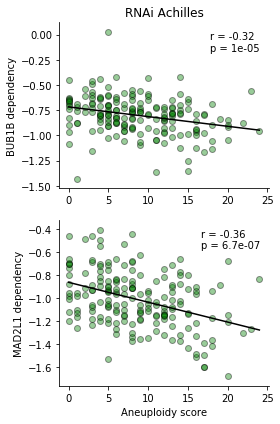

In [21]:
##########################################################################################
######################################### figex 3d #######################################
##########################################################################################

# using spearman!

import scipy
CCLE_ABSOLUTE_combined_table = tc.get(name='ccle-absolute-cn', version=5, file='CCLE_ABSOLUTE_combined_table')

CCLE_ABSOLUTE_combined_table.index = CCLE_ABSOLUTE_combined_table.loc[:,'CCLE_ID']

zero_dups = CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index
full_anot =tc.get(name='aneuploidy-data-d0b9', version=18, file='aneuploidy_data_NEW')

full_anot.index = full_anot.loc[:,'DepMap_ID']

full_anot_CCLE = full_anot.copy()
full_anot_CCLE.index = full_anot.loc[:,'CCLE_ID']

fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_drive.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Drive')
plt.tight_layout()
# plt.savefig('fig2f/corr_rnai_drive_SPEARMAN.pdf')



fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_achilles.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,5)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Achilles')
plt.tight_layout()
# plt.savefig('fig2f/corr_rnai_achilles_SPEARMAN.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels fou

RNAi Achilles p-value for BUB1B: 1.4101833774261156e-05
RNAi Achilles p-value for MAD2L1: 8.824068383590601e-07
RNAi Drive p-value for BUB1B: 4.292273720120343e-05
RNAi Drive p-value for MAD2L1: 0.0015264360058992426


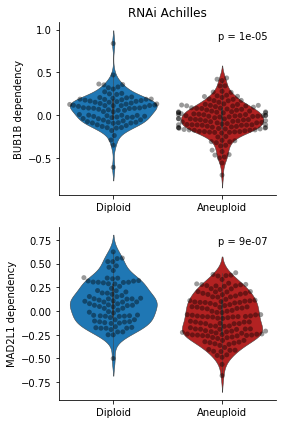

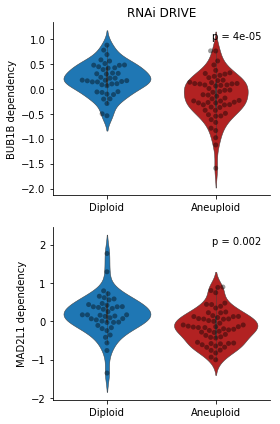

In [30]:
##########################################################################################
######################################### figex 3e #######################################
##########################################################################################

# want to also regress out doubling time
#rnai achilles

from sklearn.linear_model import LinearRegression

#using only compact data here
anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

genes = ['BUB1B (701)','MAD2L1 (4085)']

gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes].dropna()
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.loc[:,genes].dropna()
gene_effect_crispr_achilles_ = gene_effect_crispr_achilles.loc[:,genes].dropna()



for_doubling = anot_CCLE.loc[gene_effect_rnai_achilles_.index,'RNAi_doubling_time'].dropna().index


mu = gene_effect_rnai_achilles_.loc[for_doubling,genes].mean()
reg = LinearRegression().fit(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1, 1), gene_effect_rnai_achilles_.loc[for_doubling])
preds = pd.DataFrame(reg.predict(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1,1)),index = for_doubling,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles_doubling_time = ((gene_effect_rnai_achilles_.loc[for_doubling] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles_doubling_time.index)
temp = corrected_rnai_achilles_doubling_time.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_doubling_time.loc[trus,'BUB1B (701)'],corrected_rnai_achilles_doubling_time.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,5)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_doubling_time.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles_doubling_time.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,7)),frameon=False)
# plt.savef ig('fig2a/rnai_achilles_doubling_time_regressed_out.pdf')





#rnai_drive

from sklearn.linear_model import LinearRegression


for_doubling = anot_CCLE.loc[gene_effect_rnai_drive_.index,'RNAi_doubling_time'].dropna().index


mu = gene_effect_rnai_drive_.loc[for_doubling].mean()
reg = LinearRegression().fit(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1, 1), gene_effect_rnai_drive_.loc[for_doubling])
preds = pd.DataFrame(reg.predict(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1,1)),index = for_doubling,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive_doubling_time = ((gene_effect_rnai_drive_.loc[for_doubling] -mu )- preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive_doubling_time.index)
temp = corrected_rnai_drive_doubling_time.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi DRIVE')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_drive_doubling_time.loc[trus,'BUB1B (701)'],corrected_rnai_drive_doubling_time.loc[falsee,'BUB1B (701)'])
print('RNAi Drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,5)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive_doubling_time.loc[trus,'MAD2L1 (4085)'].dropna(),corrected_rnai_drive_doubling_time.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi Drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
# plt.savefig('fig2a/rnai_drive_doubling_time_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 8.799107845048906e-07
RNAi Achilles p-value for MAD2L1: 8.419702531747605e-06


No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi DRIVE p-value for BUB1B: 4.598014216115774e-07
RNAi DRIVE p-value for MAD2L1: 0.0008884262738589291


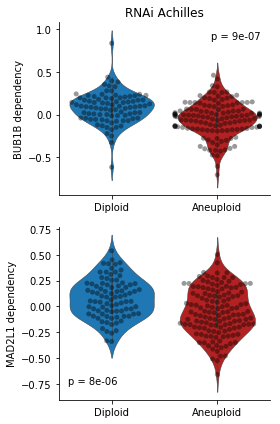

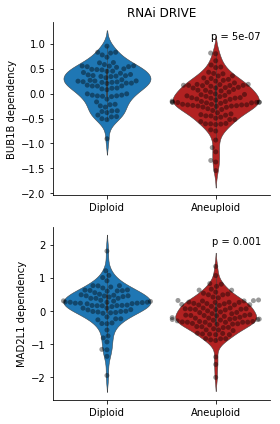

In [36]:
##########################################################################################
######################################### figex 3f #######################################
##########################################################################################
sample_info_depmap = sample_info.copy()
sample_info_depmap.index = sample_info.loc[:,'DepMap_ID']#.loc[gene_effect_rnai_achilles.index,'lineage']
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')

public_19Q4_proteincoding_tpm.columns = public_19Q4_proteincoding_tpm.columns.str.split(' ').str[0]


het70 = pd.read_csv('het70genes.csv')
het70_genes = het70.drop([0]).values[:,0]


het70_scores = public_19Q4_proteincoding_tpm.loc[:,het70_genes].mean(axis=1)
public_19Q4_proteincoding_tpm_CCLE = public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_CCLE.index = sample_info_depmap.loc[public_19Q4_proteincoding_tpm_CCLE.index,'CCLE_Name']

het70_scores_CCLE = public_19Q4_proteincoding_tpm_CCLE.loc[:,het70_genes].mean(axis=1)



#rnai achilles

for_het = anot_CCLE.index & gene_effect_rnai_achilles_.index & het70_scores_CCLE.index


mu = gene_effect_rnai_achilles_.loc[for_het].mean()
reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1, 1), gene_effect_rnai_achilles_.loc[for_het])
preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1,1)),index = for_het,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles_het_70 = ((gene_effect_rnai_achilles_.loc[for_het] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles_het_70.index)
temp = corrected_rnai_achilles_het_70.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_het_70.loc[trus,'BUB1B (701)'],corrected_rnai_achilles_het_70.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_het_70.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles_het_70.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)





#rnai_drive

for_het = anot_CCLE.index & gene_effect_rnai_drive_.index & het70_scores_CCLE.index


mu = gene_effect_rnai_drive_.loc[for_het].mean()
reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1, 1), gene_effect_rnai_drive_.loc[for_het] )
preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1,1)),index = for_het,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive_het_70 = ((gene_effect_rnai_drive_.loc[for_het] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive_het_70.index)
temp = corrected_rnai_drive_het_70.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi DRIVE')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_drive_het_70.loc[trus,'BUB1B (701)'],corrected_rnai_drive_het_70.loc[falsee,'BUB1B (701)'])
print('RNAi DRIVE p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive_het_70.loc[trus,'MAD2L1 (4085)'],corrected_rnai_drive_het_70.loc[falsee,'MAD2L1 (4085)'])
print('RNAi DRIVE p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)

